# Decision Tree Regression

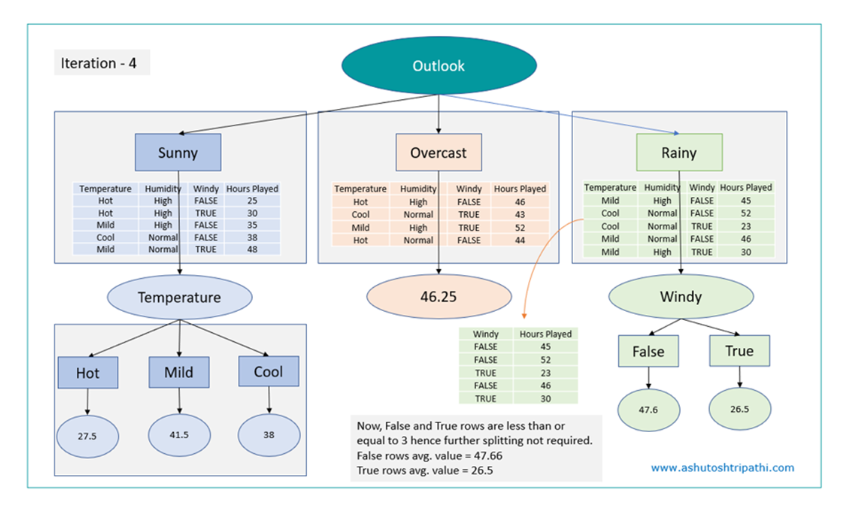

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [32]:
import pandas as pd 
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND,ADMIN,MKT,STATE

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [34]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [35]:
df.duplicated().sum()

0

### Seperate X and Y (profit)

In [36]:
x = df.drop(columns=['PROFIT'])
y = df[['PROFIT']]

In [37]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [38]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Seperate cat and con

In [39]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [40]:
cat

['STATE']

In [41]:
con

['RND', 'ADMIN', 'MKT']

### Preprocessing the data for X

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [44]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [45]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [46]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [48]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [49]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [50]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


In [51]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [52]:
xtrain.shape

(40, 6)

In [53]:
xtest.shape

(10, 6)

### Create the decision tree model

In [54]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1, min_samples_split=3, min_samples_leaf=3, criterion='squared_error')
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=3, min_samples_split=3)

In [55]:
model.score(xtrain, ytrain)

0.6268054892550098

In [56]:
model.score(xtest,ytest)

0.6434222460818757

### Hyperparameter tuning

In [64]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11],
          'min_samples_split':[5,6,7,8,9,10],
          'min_samples_leaf': [5,6,7,8,9,10],
          'criterion':['squared_error','absolute_error']}


In [65]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [66]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [67]:
gscv.best_score_

-407502899.6496593

In [68]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=5)

### Evaluate model

In [69]:
best_dtr.score(xtrain,ytrain)

0.9076241155919866

In [70]:
best_dtr.score(xtest,ytest)

0.9029537464039988

### Predicting results for train and test

In [71]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts = best_dtr.predict(xtest)

In [72]:
ypred_tr[0:5]

array([103311.9875, 123931.412 , 123931.412 , 143975.94  , 103311.9875])

In [73]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [74]:
ypred_ts[0:5]

array([174376.24166667,  52916.53166667,  52916.53166667, 103311.9875    ,
       143975.94      ])

In [75]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


### Check Mean squared error, Mean absolute error, rmse, R2

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [78]:
mse = mean_squared_error(ytest,ypred_ts)
mse

172232534.73540998

In [79]:
rmse = mse**(1/2)
rmse

13123.739357950157

In [81]:
mae = mean_absolute_error(ytest,ypred_ts)
mae

12010.248083333336

In [82]:
r2 = r2_score(ytest,ypred_ts)
r2

0.9029537464039988

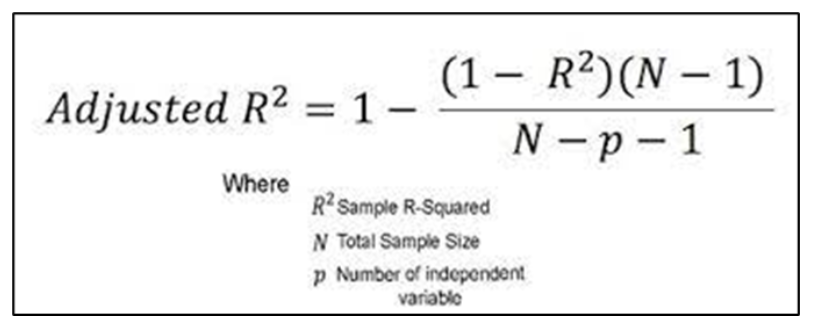

In [83]:
xtrain.shape

(40, 6)

In [84]:
xtrain.shape[0]

40

In [85]:
xtrain.shape[1]

6

In [86]:
def adj_r2(xtrain, ytrain, model):
    r2 = model.score(xtrain, ytrain)
    n = xtrain.shape[0]
    p = xtrain.shape[1]
    num = (1-r2)*(n-1)
    den = n-p-1
    r2a = 1-(num/den)
    return r2a

In [87]:
adj_r2(xtrain, ytrain, best_dtr)

0.8908285002450751

### Plot the decision tree

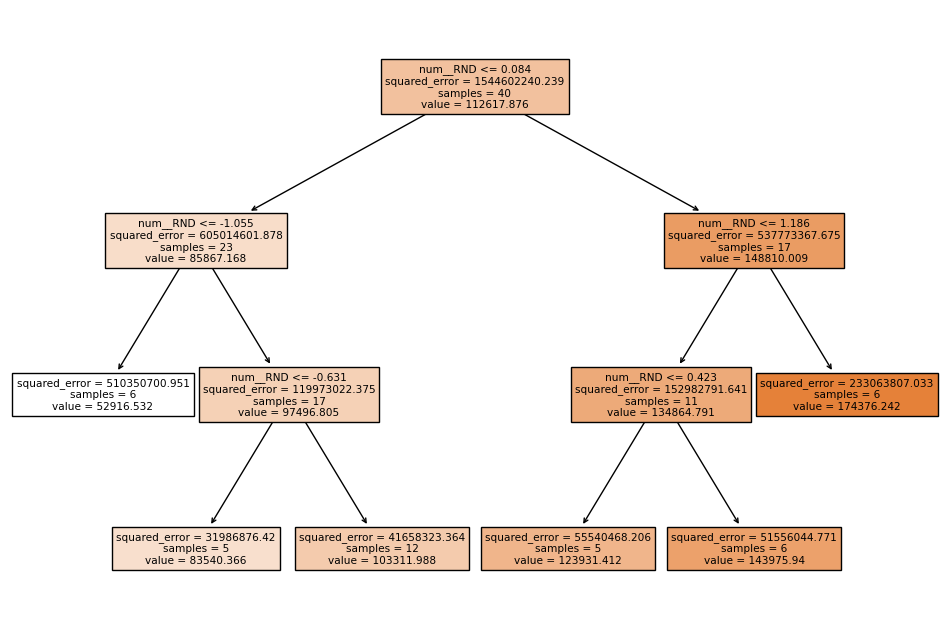

In [88]:
import matplotlib.pylab as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(best_dtr, filled=True, feature_names=xtrain.columns)
plt.show()